# Data Wrangling Very important
* **Process of `cleaning`, `transforming` and `organizing` data so that it can be used for `analysis and visualization`. It is an important step because raw dat is incomplete , inconsistent and in an unstructured format. which can make it difficult to work with.**
---
# DATA SCIENCE
### Data Driven decision making is called data science
---
## In which data cleaning occurs and data is pre-processed to further analysis od data
* Clean to that point that there is no chance for mistakes any analysis or hypothesis that is drawn form this has less chances to be wrong
## Two types of statistics
* Exploratory(Discriptive statistics Mainly consist of EDA)
* Inferential(Do analyze and prediction made forward)


---
# Data wrangling is different for every data
## Some steps are as
1. Gathering Data (What to clean)Libraries
2. Tools to clean Data (Libraries)
3. How to do (Steps)


In [43]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 01- Gathering Data


In [44]:
# 01- Gathering Data
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [45]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


# 02- ASSESING THE DATA (ALL THE STEPS OF EDA)
* For thta we check whats going on in data

# 03- Cleaning the Data

1. _**Finding and dealing with missing values**_
2. _**Correcting errors in data**_
   1. Outliers removal (Methods)
      1. Throuh Visualization
      2. IQR method
      3. Z-Score
3. _**Droping Duplicates**_

In [47]:

df.isnull().sum() / len(df)*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [48]:
df.drop(columns='deck', inplace=True)

In [49]:
# filling missing values
# df['age'] = df.age.fillna(value=df['age'].mean())
# OR    
if df['age'].isnull().values.any():
    mean = df['age'].mean()
    df['age'] = df['age'].fillna(mean)

In [50]:
df['embarked'] = df.age.fillna(value=df['embarked'].mode()[0])

In [51]:
df['embark_town'] = df.age.fillna(value=df['embark_town'].mode()[0])

In [52]:
df.isnull().sum() / len(df)*100

survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
embark_town    0.0
alive          0.0
alone          0.0
dtype: float64

# Outliers remover methode
## 01- Visualization method:

<AxesSubplot:xlabel='sex', ylabel='age'>

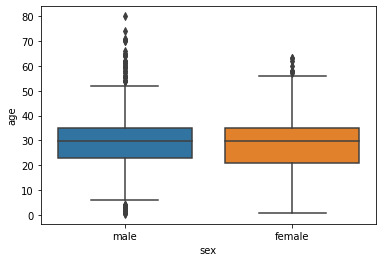

In [53]:
sns.boxplot(data=df, y='age', x='sex')

# 02- IQR methode

In [54]:
# IQR methode used to remove outliers
Q1 =df['age'].quantile(0.25)
Q3 =df['age'].quantile(0.75)
IQR= Q3 - Q1
IQR
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
df=df[(df['age'] >= lower_limit) & (df['age'] <= upper_limit)]

In [55]:
df.shape

(825, 14)

In [56]:
Q1 =df['fare'].quantile(0.25)
Q3 =df['fare'].quantile(0.75)
IQR= Q3 - Q1
IQR
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
df=df[(df['fare'] >= lower_limit) & (df['fare'] <= upper_limit)]

In [57]:
df.shape

(718, 14)

<AxesSubplot:xlabel='fare', ylabel='Count'>

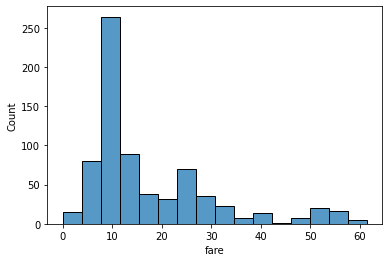

In [58]:
# Now to check data normalization that we have done using outliers removing
sns.histplot(data=df,x='fare')

# 03- Z-score methode to remove outlier

In [59]:
# from scipy import stats
# import numpy as np
# # Calculate the Z-score for each data point in the "age" column
# z_scores = stats.zscore(df["age"])

# # Create a new dataframe with only the data points with Z-scores between -3 and 3
# df_without_outliers = df[(z_scores > -3) & (z_scores < 3)]

# # Drop the data points in the original dataset that have Z-scores less than -3 or greater than 3
# df.drop(df[(z_scores < -3) | (z_scores > 3)].index, inplace=True)
# # zscore=np.abs(stats.zscore(df['age']))
# # threshold= 3
# # df[(zscore<threshold).all(axis=1)]

In [60]:
from scipy import stats
import numpy as np

# Calculate the Z-score for each data point in the "age" column, using the absolute value of Z-scores
z_scores = np.abs(stats.zscore(df["age"]))

# Create a new dataframe with only the data points with absolute Z-scores less than 3
df_without_outliers = df[z_scores < 3]

# Drop the data points in the original dataset that have absolute Z-scores greater than or equal to 3
df.drop(df[z_scores >= 3].index, inplace=True)

# finding and dropping duplicates

In [61]:
df.shape

(718, 14)

In [62]:
# finding duplicates
df.duplicated().sum()

106

In [63]:
# df1_duplicates_in_dataset=df[df.duplicated()]
# df1_duplicates_in_dataset.head()

In [64]:
# df1_duplicates_in_dataset =df.duplicated()
# df1_duplicates_in_dataset_count = df1_duplicates_in_dataset.value_counts()

# plt.bar(df1_duplicates_in_dataset_count.index, df1_duplicates_in_dataset_count.values)
# plt.show()

In [23]:
df.drop_duplicates(inplace=True)
df.shape

(612, 14)

# Data normalization
* To bring data at one scale
* Several ways for data normalization

In [24]:
# pip install scikit-learn
# first and basic library for machine learning

# MinMaxScaler:
* MinMaxScaler is a preprocessing technique used in machine learning and data science to normalize the values of a feature to a given range, usually between 0 and 1. 
* The idea behind MinMaxScaler is to scale the values of a feature to the range [0, 1] by subtracting the minimum value in the feature from each value and dividing the result by the range of the feature.

_**X_scaled = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))**_

_Where X is the input data (numeric array or dataframe) and X_scaled is the normalized data with values between 0 and 1. The axis=0 argument specifies that the minimum and maximum values are computed along the column axis. The equation scales the values of X to a given range, typically [0, 1]._

In [69]:
# 1- libraries import
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 2- data
df

# 3- select columns to normalize
cols_to_norm= ['age','fare'] # used to work on multiple columns

# 4- Create scaller function/tool
scaler = MinMaxScaler()

# 5- Fit and transform the age and fare columns using MinMaxScaler
df[cols_to_norm] = scaler.fit_transform(df[cols_to_norm])

# 6- Check the Data
df

# now the data of `age` and `fare` is scalled in one scale And Now it Wiil Help To Use Describe Function

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,0.372549,1,0,0.118118,22.000000,Third,man,True,22.000000,no,False
2,1,3,female,0.450980,0,0,0.129115,26.000000,Third,woman,False,26.000000,yes,True
3,1,1,female,0.627451,1,0,0.865114,35.000000,First,woman,False,35.000000,yes,False
4,0,3,male,0.627451,0,0,0.131152,35.000000,Third,man,True,35.000000,no,True
5,0,3,male,0.523512,0,0,0.137804,29.699118,Third,man,True,29.699118,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0.470588,0,0,0.211798,27.000000,Second,man,True,27.000000,no,True
887,1,1,female,0.313725,0,0,0.488765,19.000000,First,woman,False,19.000000,yes,True
888,0,3,female,0.523512,1,2,0.382051,29.699118,Third,woman,False,29.699118,no,False
889,1,1,male,0.450980,0,0,0.488765,26.000000,First,man,True,26.000000,yes,True


In [26]:
df.describe()

,survived,pclass,age,sibsp,parch,fare,embarked,embark_town
count,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000
mean,0.361111,2.467320,0.497598,0.462418,0.367647,0.299669,28.377480,28.377480
std,0.480716,0.741947,0.209903,0.895648,0.837227,0.221551,10.705039,10.705039
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000
25%,0.000000,2.000000,0.367647,0.000000,0.000000,0.128640,21.750000,21.750000
50%,0.000000,3.000000,0.523512,0.000000,0.000000,0.211798,29.699118,29.699118
75%,1.000000,3.000000,0.607843,1.000000,0.000000,0.423596,34.000000,34.000000
max,1.000000,3.000000,1.000000,5.000000,6.000000,1.000000,54.000000,54.000000


# StandardScaler
* StandardScaler is a preprocessing technique used in machine learning and data science to standardize the values of a feature by transforming them to have zero mean and unit variance. 
* This is done by subtracting the mean of the feature from each value and dividing the result by the standard deviation of the feature. The resulting values are called standard scores or z-scores.
* Standardizing the values of a feature can be useful in many machine learning algorithms as many algorithms assume that the features are normally distributed and have similar scales.

z = (x - μ) / σ

where x is the original value of the feature, μ is the mean of the feature, σ is the standard deviation of the feature, and z is the standardized or normalized value, also known as the z-score.

By transforming the values of a feature in this way, you can ensure that the feature has zero mean and unit variance, which can be useful in many machine learning algorithms.


In [27]:
# 1- libraries import
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 2- data
df

# 3- select columns to normalize
cols_to_norm= ['age','fare'] # used to work on multiple columns

# 4- Create scaller function/tool
scaler = StandardScaler()

# 5- Fit and transform the age and fare columns using StandardScaler
df[cols_to_norm] = scaler.fit_transform(df[cols_to_norm])

# 6- Check the Data
df

# now `age` and `fare` is scalled in one scale And Now it Wiil Help To Use Describe Function

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,-0.596233,1,0,-0.820124,22.000000,Third,man,True,22.000000,no,False
2,1,3,female,-0.222272,0,0,-0.770446,26.000000,Third,woman,False,26.000000,yes,True
3,1,1,female,0.619142,1,0,2.554297,35.000000,First,woman,False,35.000000,yes,False
4,0,3,male,0.619142,0,0,-0.761247,35.000000,Third,man,True,35.000000,no,True
5,0,3,male,0.123560,0,0,-0.731197,29.699118,Third,man,True,29.699118,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,0.993103,0,5,0.789809,39.000000,Third,woman,False,39.000000,no,False
887,1,1,female,-0.876704,0,0,0.854207,19.000000,First,woman,False,19.000000,yes,True
888,0,3,female,0.123560,1,2,0.372147,29.699118,Third,woman,False,29.699118,no,False
889,1,1,male,-0.222272,0,0,0.854207,26.000000,First,man,True,26.000000,yes,True


In [28]:
df.describe()

,survived,pclass,age,sibsp,parch,fare,embarked,embark_town
count,612.000000,612.000000,6.120000e+02,612.000000,612.000000,6.120000e+02,612.000000,612.000000
mean,0.361111,2.467320,1.894817e-16,0.462418,0.367647,1.146505e-16,28.377480,28.377480
std,0.480716,0.741947,1.000818e+00,0.895648,0.837227,1.000818e+00,10.705039,10.705039
min,0.000000,1.000000,-2.372550e+00,0.000000,0.000000,-1.353702e+00,3.000000,3.000000
25%,0.000000,2.000000,-6.196056e-01,0.000000,0.000000,-7.725952e-01,21.750000,21.750000
50%,0.000000,3.000000,1.235604e-01,0.000000,0.000000,-3.969416e-01,29.699118,29.699118
75%,1.000000,3.000000,5.256514e-01,1.000000,0.000000,5.598189e-01,34.000000,34.000000
max,1.000000,3.000000,2.395459e+00,5.000000,6.000000,3.163621e+00,54.000000,54.000000


# Log Transformation

_**A log transformation is a common technique used to normalize skewed or skewed data in statistics and machine learning. The log transformation maps the data to a new scale, where differences between small values are more pronounced and differences between large values are less pronounced.**_

y = log(x)

_where x is the original data and y is the transformed data. The log transformation can help to improve the distribution of the data, make patterns in the data more visible, and stabilize the variance of the data._

In [29]:
kashti = sns.load_dataset('titanic')
kashti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [30]:
# first to fill the nan values then take the log
import numpy as np
kashti['age'] = kashti['age'].fillna(kashti['age'].median())
kashti['fare'] = kashti['fare'].fillna(kashti['fare'].median())

# log transform
kashti['age'] = np.log(kashti['age'])
kashti['fare'] = np.log(kashti['fare'])
kashti.head() # log brings the values to smaller value

c:\Users\DELL\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,3.091042,1,0,1.981001,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,3.637586,1,0,4.266662,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,3.258097,0,0,2.070022,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,3.555348,1,0,3.972177,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,3.555348,0,0,2.085672,S,Third,man,True,NaN,Southampton,no,True


<AxesSubplot:xlabel='who', ylabel='fare'>

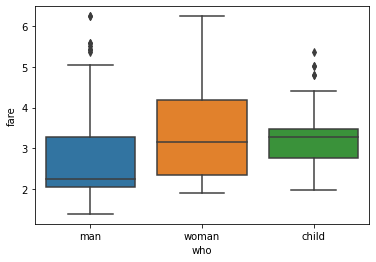

In [31]:
sns.boxplot(data=kashti,x='who',y='fare')

<AxesSubplot:xlabel='who', ylabel='age'>

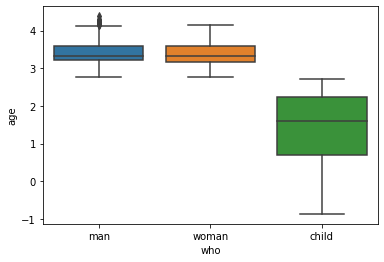

In [32]:
sns.boxplot(data=kashti,x='who',y='age')

# Organizing Data

In [33]:
df['family_size']= df['sibsp'] + df['parch']

c:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='sex', ylabel='age'>

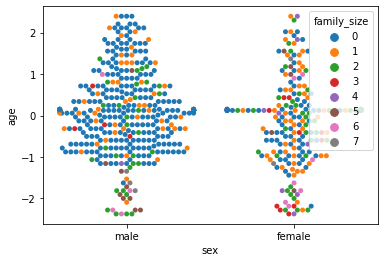

In [34]:
sns.swarmplot(data=df, x="sex", y="age", hue="family_size")

In [35]:
# renaming the column names
df=df.rename(columns={'survived':'survival'})

In [36]:
df.columns

Index(['survival', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'family_size'],
      dtype='object')

In [66]:
# pivot tables
table_names = pd.pivot_table(data=df, values='fare' ,index='sex' ,
                             columns='survived', aggfunc=np.mean)
table_names

survived,0,1
sex,,
female,17.681774,21.430310
male,14.373591,22.546937


In [67]:
# pivot tables
table_names = pd.pivot_table(data=df, values='fare' ,index='who' ,
                             columns='survived', aggfunc=np.mean)
table_names

survived,0,1
who,,
child,28.475336,20.996810
man,13.734053,22.894977
woman,16.608746,21.421291


<AxesSubplot:xlabel='fare', ylabel='age'>

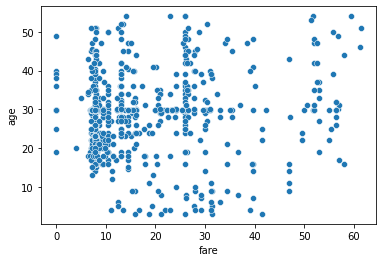

In [68]:
sns.scatterplot(data=df, y='age', x='fare')

In [70]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,0.372549,1,0,0.118118,22.000000,Third,man,True,22.000000,no,False
2,1,3,female,0.450980,0,0,0.129115,26.000000,Third,woman,False,26.000000,yes,True
3,1,1,female,0.627451,1,0,0.865114,35.000000,First,woman,False,35.000000,yes,False
4,0,3,male,0.627451,0,0,0.131152,35.000000,Third,man,True,35.000000,no,True
5,0,3,male,0.523512,0,0,0.137804,29.699118,Third,man,True,29.699118,no,True


# Saving the Wrangled data


In [76]:
df.to_csv("preprocessed_data.csv" )
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,0.372549,1,0,0.118118,22.000000,Third,man,True,22.000000,no,False
2,1,3,female,0.450980,0,0,0.129115,26.000000,Third,woman,False,26.000000,yes,True
3,1,1,female,0.627451,1,0,0.865114,35.000000,First,woman,False,35.000000,yes,False
4,0,3,male,0.627451,0,0,0.131152,35.000000,Third,man,True,35.000000,no,True
5,0,3,male,0.523512,0,0,0.137804,29.699118,Third,man,True,29.699118,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0.470588,0,0,0.211798,27.000000,Second,man,True,27.000000,no,True
887,1,1,female,0.313725,0,0,0.488765,19.000000,First,woman,False,19.000000,yes,True
888,0,3,female,0.523512,1,2,0.382051,29.699118,Third,woman,False,29.699118,no,False
889,1,1,male,0.450980,0,0,0.488765,26.000000,First,man,True,26.000000,yes,True
